from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important;}</style>"))

# PROJECT SETUP

### IMPORTS

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys

### COLLECTING DATA

In [2]:
subjects_quantity = 40
sbj_photos = 10

people_raw = list() # ALL 10 PHOTOS FROM EACH PERSON
people_subjects = list() # FIRST PHOTO FROM EACH PERSON
people_dataset_raw = list() # 9 PHOTOS FOR EACH PERSON DATASET

for j in range(1, subjects_quantity+1):
    # For para cada imagem
    for i in range(1, sbj_photos+1):
        people_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i == 1:
            people_subjects.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i != 1:
            people_dataset_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))

In [3]:
print(f"Dataset size: {len(people_dataset_raw)}")

Dataset size: 360


### RAW DATA SHOW UP

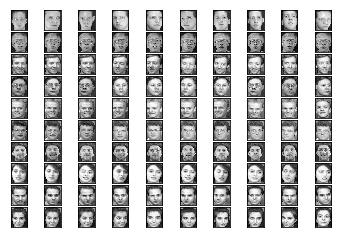

In [4]:
nrows, ncols = 10, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people_raw[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

### BELOW, ALL THE ARRAYS ARE DATASET ONLY

Creating an array with fourier transform from raw data set array:

In [5]:
people_fft = [np.fft.fft2(person) for person in people_dataset_raw]

people_unique_fft = [np.fft.fft2(person) for person in people_subjects]

'people_fft' is now an array containing a fourier transformed version of each photo from the dataset.

To conclude an ideal analysis, the original fourier transformed image is not the easiest data to work with, so, the purpose of the next command is to create a  version of each imagem with it's relative relevant data shifted to the center of the picture.

In [6]:
people_fft_s = [np.fft.fftshift(person) for person in people_fft]

people_unique_fft_s = [np.fft.fftshift(person) for person in people_unique_fft]

Now, showing one example from the raw data, the fourier transformed, and the shifted one:

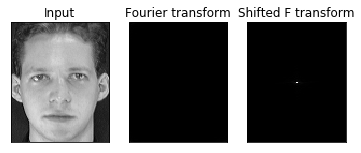

In [7]:
plt.subplot(131)
plt.imshow(people_raw[0], cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(np.abs(people_fft[0]), cmap = 'gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(np.abs(people_fft_s[0]), cmap = 'gray')
plt.title('Shifted F transform'), plt.xticks([]), plt.yticks([])

plt.show()

## FINISHED SETUP

# STARTING THE PROJECT

The next part of the project consists of:

1. Create the list of redimensioned image  
1. Analyze the Mean Square Error (MSE)
1. Classify samples from MSE


### 1. Create the list of redimensioned image: 
    we need to create a function that returns only the relevant part of the image. That integer input will be the dimensions of the usable image data. The dimensions used in this projest are: 2x2 until 30x30


In [8]:
#cut image according to the last dimension
def crop_img(dimension, image):
    #current dimensions of imagens in the database
    image_width = 92
    image_height = 112
    
    # center of the image 
    x = image_height//2
    y = image_width//2
    
    # Radius of the area
    r = dimension//2
    
    odd = 0
    #testing if image is odd
    if dimension % 2 != 0:
        odd = -1
    
    return image[x-r+odd:x+r,y-r+odd:y+r]

In [9]:
people = np.array(people_fft_s)
people.shape

(360, 112, 92)

In [31]:
cropped = crop_img(30, people_raw[0])
cropped.shape

(50, 50)

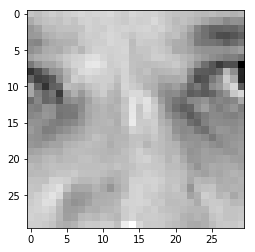

In [11]:
plt.imshow(cropped, "gray")

### 2. Analyze the Mean Square Error (MSE): 
 we need to create a function that calculate the distante between the samples and the image that we want classify, for that we testing two algorits:

    1. First case with SkLearn

    2. Second case with other implementation

In [13]:
X = np.array(crop_full)
X.shape

(360, 900)

Labels para o KNN

In [14]:
y = [i for i in range(40) for j in range(9)]

In [15]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 3

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#neigh = KNeighborsClassifier(n_neighbors=1, metric="seuclidean", metric_params={"V":25})
neigh = KNeighborsClassifier(n_neighbors=1, metric="euclidean")

In [17]:
neigh.fit(X.real, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
y_predict = []

for image in crop_unique:
    y_predict.append(neigh.predict([image.real]))
    print(neigh.predict([image.real]), end= " ")

y_predict = np.array(y_predict)
    
print()


[0] [1] [2] [3] [4] [5] [6] [7] [8] [9] [10] [11] [12] [13] [14] [15] [16] [17] [18] [19] [20] [21] [22] [23] [24] [25] [26] [27] [28] [29] [30] [31] [32] [33] [34] [35] [36] [37] [38] [39] 


Exemple of confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
y_true = [i for i in range(0,40)]
y_pred = y_predict

conf_matrix = confusion_matrix(y_true, y_pred)

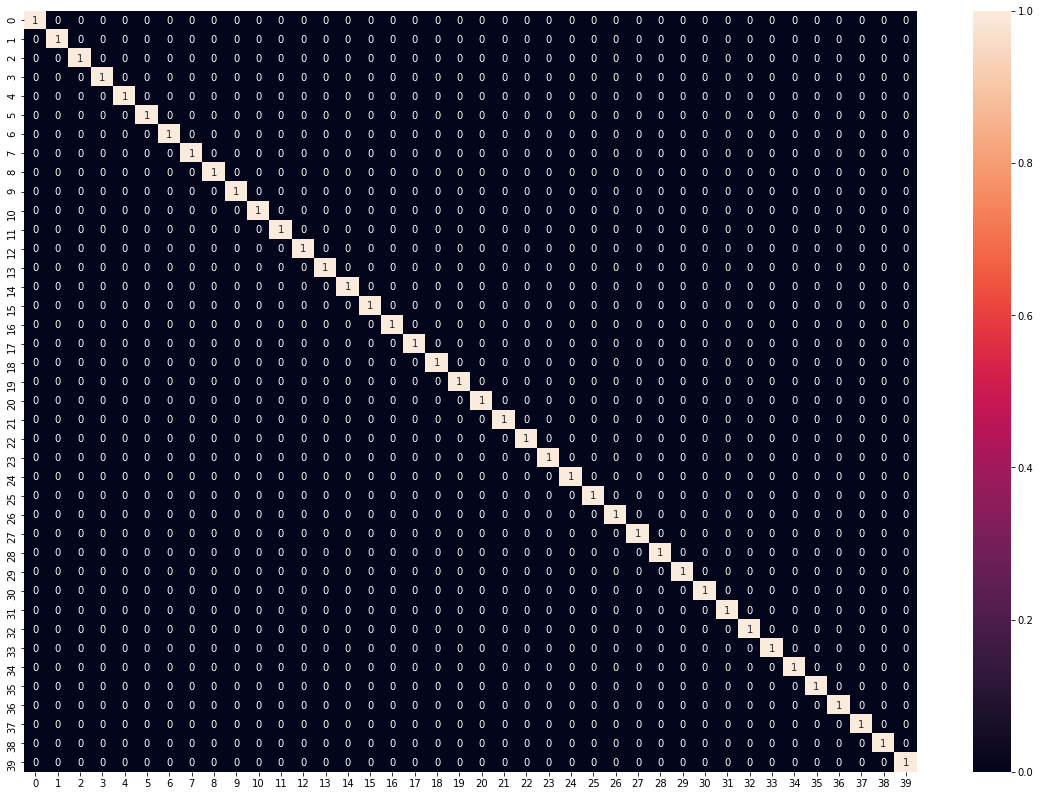

In [20]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

0.0

Implementando KNN com o erro medio quadradico como medida


In [22]:
import math

indices_mais_proximos = []

foo = []

# Para cada imagem sem label execute
for i, image_without_label in enumerate(crop_unique):
    
    mais_proximo_até_agora = math.inf
    indice_mais_proximo = 0
    
    print("Para pessoa", i )
    # Para cada imagem com label execute     
    for j, image_with_label in enumerate(crop_full):
        mqe = mean_squared_error(image_with_label.real, image_without_label.real)
        if mqe < mais_proximo_até_agora:
            mais_proximo_até_agora = mqe
            indice_mais_proximo = j
            print(indice_mais_proximo)
    print(indice_mais_proximo)
    indices_mais_proximos.append(indice_mais_proximo)
    foo.append(y[indice_mais_proximo])

Para pessoa 0
0
1
6
6
Para pessoa 1
0
1
5
9
10
10
Para pessoa 2
0
1
8
9
10
11
14
16
18
19
25
25
Para pessoa 3
0
1
8
9
10
13
16
18
19
20
27
28
33
33
Para pessoa 4
0
14
17
18
20
21
36
38
38
Para pessoa 5
0
16
18
36
37
45
46
46
Para pessoa 6
0
1
9
10
18
19
22
25
54
55
55
Para pessoa 7
0
1
8
9
10
18
19
20
63
63
Para pessoa 8
0
1
8
9
10
13
16
18
34
72
73
73
Para pessoa 9
0
1
8
9
10
11
16
18
73
81
81
Para pessoa 10
0
1
8
9
11
13
16
19
25
26
54
90
91
91
Para pessoa 11
0
1
5
22
99
103
105
105
Para pessoa 12
0
1
5
20
36
37
108
108
Para pessoa 13
0
1
6
9
10
20
21
117
119
119
Para pessoa 14
0
1
5
8
9
11
16
127
127
Para pessoa 15
0
1
9
11
16
117
118
121
127
130
139
139
Para pessoa 16
0
1
5
6
8
9
10
28
29
63
65
127
144
147
147
Para pessoa 17
0
1
3
8
30
42
112
153
153
Para pessoa 18
0
1
5
8
9
10
12
162
162
Para pessoa 19
0
1
8
9
11
13
16
18
171
171
Para pessoa 20
0
1
8
9
10
14
16
18
72
73
180
180
Para pessoa 21
0
1
5
6
8
9
10
11
16
18
28
54
90
117
118
120
123
125
171
189
190
190
Para pessoa 22
0
1
8

In [23]:
indices_mais_proximos

[6,
 10,
 25,
 33,
 38,
 46,
 55,
 63,
 73,
 81,
 91,
 105,
 108,
 119,
 127,
 139,
 147,
 153,
 162,
 171,
 180,
 190,
 206,
 207,
 217,
 229,
 236,
 247,
 252,
 269,
 276,
 282,
 289,
 301,
 306,
 318,
 331,
 337,
 342,
 357]

In [24]:
labels_mais_proximos = []

for indice in indices_mais_proximos:
    labels_mais_proximos.append(y[indice])

In [25]:
labels_mais_proximos == foo

True

In [26]:
from sklearn.metrics import confusion_matrix
y_true = [i for i in range(0,40)]
y_pred = labels_mais_proximos

conf_matrix = confusion_matrix(y_true, y_pred)

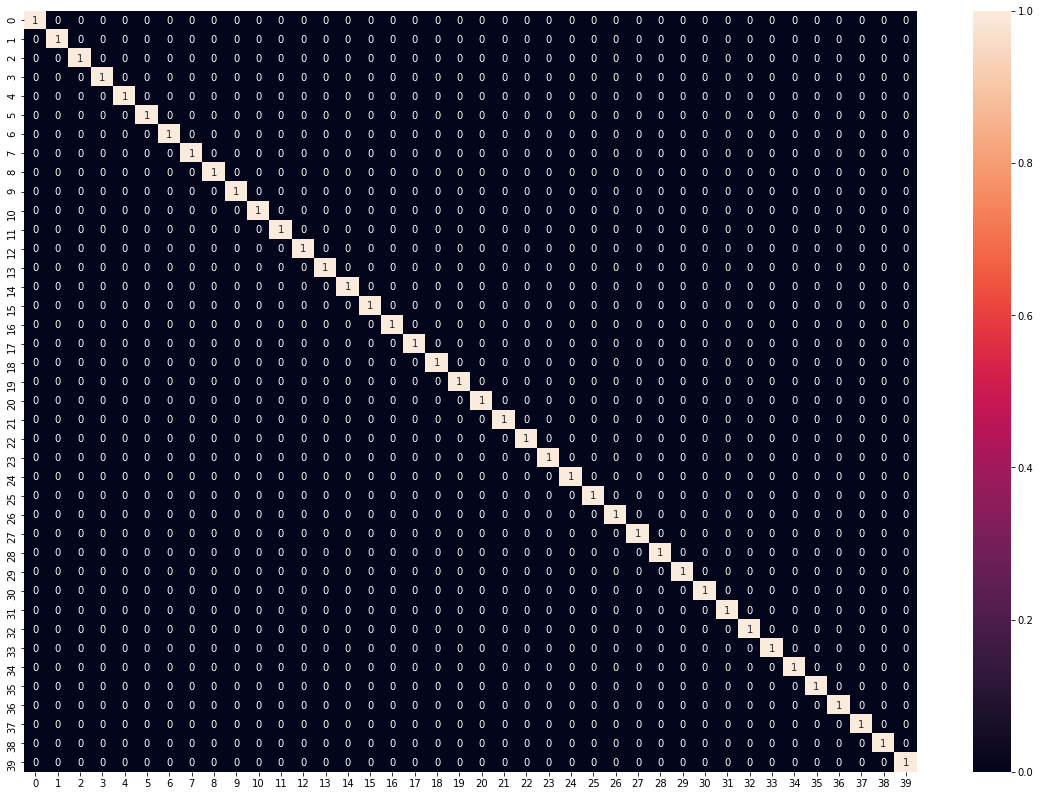

In [27]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)